<a href="https://colab.research.google.com/github/yuhui-0611/ESAA/blob/main/YB_1121_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [2]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [3]:
# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [4]:
# 정확도 결과
from sklearn.metrics import accuracy_score
y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9492

# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [5]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [6]:
# PCA 적용 95% : n_components=0.95
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
x_test_reduced = pca.transform(X_test)

In [7]:
# PCA 이후 랜덤포레스트 훈련
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [8]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
y_pred2 = rf_clf.predict(x_test_reduced)
accuracy_score(y_test, y_pred2)

0.8925

**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [9]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [10]:
load_wine = load_wine()
X = load_wine.data
y = load_wine.target

(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [11]:
X_scaled = StandardScaler().fit_transform(X)

(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [19]:
# PCA 모델을 X_scaled에 적용하여 2개의 차원으로 추출한다.

PCA_model = PCA(n_components=2, random_state=1234)
X_pca = PCA_model.fit_transform(X_scaled)

In [22]:
print(X_pca)

[[ 3.31675081  1.44346263]
 [ 2.20946492 -0.33339289]
 [ 2.51674015  1.0311513 ]
 [ 3.75706561  2.75637191]
 [ 1.00890849  0.86983082]
 [ 3.05025392  2.12240111]
 [ 2.44908967  1.17485013]
 [ 2.05943687  1.60896307]
 [ 2.5108743   0.91807096]
 [ 2.75362819  0.78943767]
 [ 3.47973668  1.30233324]
 [ 1.7547529   0.61197723]
 [ 2.11346234  0.67570634]
 [ 3.45815682  1.13062988]
 [ 4.31278391  2.09597558]
 [ 2.3051882   1.66255173]
 [ 2.17195527  2.32730534]
 [ 1.89897118  1.63136888]
 [ 3.54198508  2.51834367]
 [ 2.0845222   1.06113799]
 [ 3.12440254  0.78689711]
 [ 1.08657007  0.24174355]
 [ 2.53522408 -0.09184062]
 [ 1.64498834 -0.51627893]
 [ 1.76157587 -0.31714893]
 [ 0.9900791   0.94066734]
 [ 1.77527763  0.68617513]
 [ 1.23542396 -0.08980704]
 [ 2.18840633  0.68956962]
 [ 2.25610898  0.19146194]
 [ 2.50022003  1.24083383]
 [ 2.67741105  1.47187365]
 [ 1.62857912  0.05270445]
 [ 1.90269086  1.63306043]
 [ 1.41038853  0.69793432]
 [ 1.90382623  0.17671095]
 [ 1.38486223  0.65863985]
 

(5) 추출한 피처를 그래프로 나타내라.

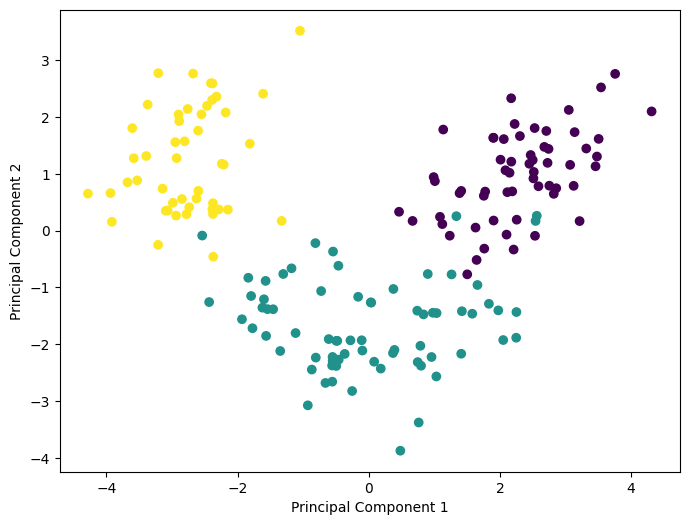

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [14]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [15]:
# LDA 적용 : n_components=5
lda = LDA(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [16]:
# LDA 이후 랜덤포레스트 훈련
rf_clf2 = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf2.fit(X_train_lda, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [17]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
y_pred3 = rf_clf2.predict(X_test_lda)
accuracy_score(y_test, y_pred3)

0.8301